# **PROYECTO FINAL**
Desarrollo de un Sistema de Análisis de Noticias Salvadoreñas
Periodico: Última Hora, https://ultimahora.sv/
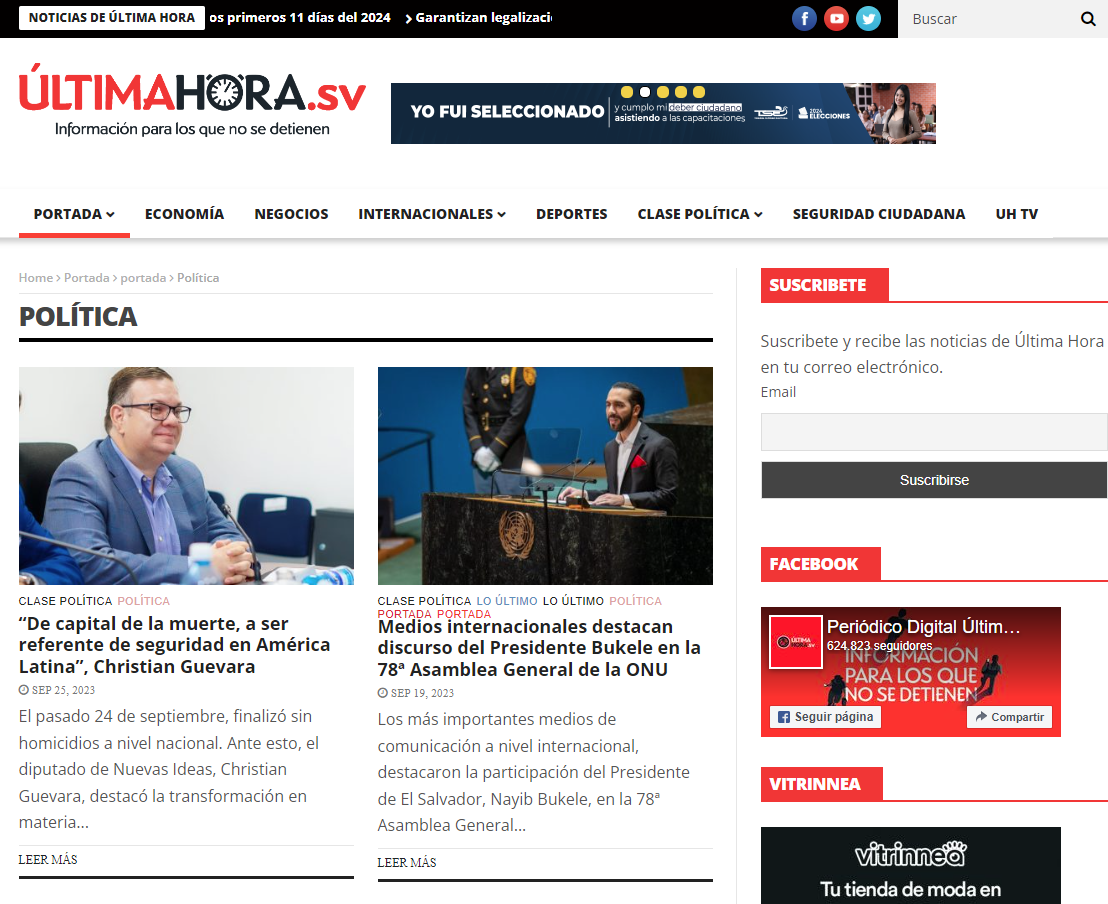

Este proyecto permitirá a los integrantes a aplicar de manera práctica los conceptos aprendidos en el curso de **Fundamentos de Ciencia de Datos** y desarrollar habilidades en el manejo de datos, aprendizaje automático, procesamiento del lenguaje natural y creación de interfaces interactivas.

#GRUPO


1.   Roxana Contreras
2.   Dionisia Escobar
3.   Carlos Hurtado
4.   Alicia Sanchez
5.   Luis Tobar


A continuación el código se mostrara según las tareas especificadas, las cuales son cinco:


# **WEB SCRAPING**

### 1.1 •	Utilizando las bibliotecas

In [34]:
# Instalando librerias y dependencias

import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
sns.set()

Creando una función para arreglar fechas y así, normalizar los datos de fecha y hora.

In [2]:
# Funcion para arreglar fechas:
from datetime import datetime

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

def fecha(cadena):
    cadena = cadena.replace(",","")
    cadena = cadena.replace(":"," ")
    cadena = cadena.strip()

    digitos = [ int (s) for s in cadena.split() if s.isdigit()]

    dia = digitos[0]
    mes = 0
    an = digitos[1]

    for m in meses:
      if m in cadena:
        mes = meses.index(m)+1
      else:
        pass

    return str(datetime(an, mes, dia, digitos[2], digitos[3], 0))

#Prueba:
cadena = "Nov 26, 2023, 14:50 pm"
print(fecha(cadena))
print(datetime.strptime(fecha(cadena),"%Y-%m-%d %H:%M:%S"))

# Elemento vacio
nada = None

2023-11-26 14:50:00
2023-11-26 14:50:00


Creando las listas de URL´s base que se usaran para extraer los datos del sitio web ultimahora.sv. La lista se crea añadiendo el numero de pagina a la URL base.

In [5]:
url_base = ["https://ultimahora.sv/category/portada/portada-portada/"]

# Numero de paginas a extraer
paginas = 2

for i in range(paginas):
    if i == 0:
      pass
    else:
      extra = "page/"+str(i+1)+'/'
      url_base.append(url_base[0]+extra)

#print(url_base)
print('\n'.join(url_base))

https://ultimahora.sv/category/portada/portada-portada/
https://ultimahora.sv/category/portada/portada-portada/page/2/


* Extracción de urls y títulos
* Eliminación de repetidos

Utilizamos las bibliotecas en mencion para extraer datos del sitio web: ultimahora.sv


*   La biblioteca "requests" se utiliza para hacer peticiones HTTP al sitio web
*   y la biblioteca "BeautifulSoup", se utiliza para anlaizar el codigo HTML de la respuesta.



In [9]:
# Recorriendo url_base, buscamos los urls de cada noticia y otros elementos

import requests
from bs4 import BeautifulSoup

elementos_temp = []

for url in url_base:
    response = requests.get(url)

    if response.status_code == 200:
        contenido_html = response.text
        soup = BeautifulSoup(contenido_html, 'html.parser')

        for post in soup.select('h3', class_='image-post-title feature_2col'):
            #
            # Extracción de url y titulo
            #
            if post.find('a'):
                url_tem = post.find('a').get('href')
                title_tem = post.text.strip()
                elementos_temp.append((url_tem, title_tem))
            else:
                pass
    else:
        print(f"No se pudo obtener la página. Código de estado: {response.status_code}")

n = len(set(elementos_temp))
#
# Quitando urls repetidas
#
indice = 0
while indice < n:
    elemento_actual = elementos_temp[indice]
    if elementos_temp.count(elemento_actual) > 1:
        elementos_temp.remove(elemento_actual)
    else:
        indice += 1

print(elementos_temp)


print(len(elementos_temp))

[('https://ultimahora.sv/secretario-del-fmln-y-sus-negocios-oscuros-con-torres-de-telefonia-en-santa-tecla/', 'Secretario del FMLN y sus negocios oscuros con torres de telefonía en Santa Tecla'), ('https://ultimahora.sv/tahnya-pastor-la-oposicion-es-cinica-y-cobarde/', 'Tahnya Pastor: La oposición es cínica y cobarde'), ('https://ultimahora.sv/el-salvador-registra-notable-reduccion-en-tasa-de-homicidios-en-los-primeros-11-dias-del-2024/', 'El Salvador registra notable reducción en tasa de homicidios en los primeros 11 días del 2024'), ('https://ultimahora.sv/garantizan-legalizacion-de-terrenos-a-familias-de-la-comunidad-emmanuel-san-martin/', 'Garantizan legalización de terrenos a familias de la comunidad Emmanuel, San Martín'), ('https://ultimahora.sv/gobierno-logra-erradicar-motines-y-masacres-en-carceles-de-el-salvador/', 'Gobierno logra erradicar motines y masacres en cárceles de El Salvador'), ('https://ultimahora.sv/dom-inicia-segundo-proyecto-de-recuperacion-vial-en-el-paisnal/'

* Registro de: url, title
* Extracción de: author, content, publication_date, category_id

In [19]:
# Hay que llenar estas listas para el dataframe

author = []   # una lista de los autores de los artículos de noticias.
title = []    # una lista de los títulos de los artículos de noticias
content = []  # una lista del contenido de los artículos de noticias.
date = []     # una lista de las fechas de publicación de los artículos de noticias.
url = []      # una lista de las URLs de los artículos de noticias.
category = [] # una lista de las categorías de los artículos de noticias.
sourse = []   # una lista de las fuentes de los artículos de noticias.
type_ = []    # una lista de los tipos de los artículos de noticias.

# El código itera sobre la lista elementos_temp,
# que contiene las URLs de los artículos de noticias.
for elemento in elementos_temp:
    new = elemento[0]
    response = requests.get(new)

    # Para cada URL, el código realiza una petición HTTP a la URL
    # y analiza el código HTML de la respuesta.
    if response.status_code == 200:

        # Registro de url
        url.append(new)

        # Registro del título
        title.append(elemento[1])

        #La sopa
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracción del author
        author_element = soup.select_one("div.author-name")
        author.append(author_element.text.strip().replace("Por ", "") if author_element else nada)

        # Extracción de la fecha de publicación
        date_element = soup.find("span", class_="post-date updated")
        date.append(fecha(date_element.text.strip()) if date_element else nada)

        # Extracción del contenido
        content_elements = soup.select('div.post_content')
        content_text = ' '.join(element.text.strip() for element in content_elements)
        content_text = content_text.replace("\n", " ").replace("\t", " ").replace("\xa0", " ")
        content.append(content_text)

        # Extracción de la categoría
        category_element = soup.select_one("span.meta-category-small")
        category.append(category_element.text if category_element else nada)

    else:
        print(f"No se pudo obtener la página. Código de estado: {response.status_code}")

* Creando el DATA FRAME a partir de las listas, creadas anteriormente.
* Registro de las listas: sourse_id, sourse_type

In [20]:
import pandas as pd

# Creando el dataframe
data= pd.DataFrame({'author_id': author,'title': title, "content": content, 'publication_date': date, 'url': url, 'category_id': category})

# Registro de fuente
data["sourse_id"]= "Última Hora SV"

# Registro de tipo de fuente
data["sourse_type"]= 'Web Page'

# imprimiendo el DATAFRAME
data

,author_id,title,content,publication_date,url,category_id,sourse_id,sourse_type
0,Redacción UH,Secretario del FMLN y sus negocios oscuros con...,"El secretario general del FMLN, Oscar Ortiz, f...",2024-01-15 12:35:00,https://ultimahora.sv/secretario-del-fmln-y-su...,Clase políticaClase Política,Última Hora SV,Web Page
1,Redacción UH,Tahnya Pastor: La oposición es cínica y cobarde,"Esta mañana, durante una entrevista, la abogad...",2024-01-15 07:50:00,https://ultimahora.sv/tahnya-pastor-la-oposici...,Clase política,Última Hora SV,Web Page
2,Redacción UH,El Salvador registra notable reducción en tasa...,La lucha contra la criminalidad en El Salvador...,2024-01-12 21:10:00,https://ultimahora.sv/el-salvador-registra-not...,portadaPortadaSeguridad ciudadana,Última Hora SV,Web Page
3,Redacción UH,Garantizan legalización de terrenos a familias...,"El Gobierno de la República, continúa garantiz...",2024-01-12 18:57:00,https://ultimahora.sv/garantizan-legalizacion-...,NacionalesportadaPortada,Última Hora SV,Web Page
4,Redacción UH,Gobierno logra erradicar motines y masacres en...,Desde el inicio de la gestión presidencial de ...,2024-01-12 09:45:00,https://ultimahora.sv/gobierno-logra-erradicar...,Lo ÚltimoSeguridad ciudadana,Última Hora SV,Web Page
5,Redacción UH,DOM inicia segundo proyecto de recuperación vi...,La Dirección de Obras Municipales (DOM) ha ini...,2024-01-12 08:37:00,https://ultimahora.sv/dom-inicia-segundo-proye...,Lo Últimoportada,Última Hora SV,Web Page
6,Redacción UH,El Salvador logra reducción sostenida en la in...,"Desde agosto de 2022 hasta diciembre de 2023, ...",2024-01-12 08:00:00,https://ultimahora.sv/el-salvador-logra-reducc...,Lo Últimoportada,Última Hora SV,Web Page
7,Redacción UH,Gobierno inicia amplio operativo de verificaci...,El Gobierno a través de la Defensoría del Cons...,2024-01-12 07:41:00,https://ultimahora.sv/gobierno-inicia-amplio-o...,Lo Últimoportada,Última Hora SV,Web Page
8,Redacción UH,"DOM inicia restauración vial en Huizúcar, La L...",La Dirección de Obras Municipales (DOM) anunci...,2024-01-11 14:07:00,https://ultimahora.sv/dom-inicia-restauracion-...,Lo últimoportada,Última Hora SV,Web Page
9,Redacción UH,Más del 90% de los salvadoreños afirmó sentirs...,Según una encuesta pública del IUDOP de la UCA...,2024-01-11 11:54:00,https://ultimahora.sv/mas-del-90-de-los-salvad...,Lo últimoportada,Última Hora SV,Web Page




*   Almacenamiento del archivo"Noticias Ultima Hora.cvs" que contiene el DATAFRAME
*   Generando un archivo .txt ordenado
*   Guardar todo el contenido del DataFrame en un archivo JSON



In [7]:
# Guardar todo el contenido del DataFrame en un archivo CSV
data.to_csv('Noticias Ultima Hora.csv', index=False)

# Generar un archivo de texto para comprobar el contenido guardado
with open('Noticias Ultima Hora.txt', 'w', encoding='utf-8') as file:
    for index, row in data.iterrows():
        file.write(f'Título: {row["title"]}\n')
        file.write(f'Autor: {row["author_id"]}\n')
        file.write(f'Fecha de Publicación: {row["publication_date"]}\n')
        file.write(f'Contenido: {row["content"]}\n')
        file.write(f'Categoría: {row["category_id"]}\n')
        file.write(f'URL: {row["url"]}\n')
        file.write(f'Fuente: {row["sourse_id"]}\n')
        file.write(f'Tipo de fuente: {row["sourse_type"]}\n')
        file.write('\n' + '-'*50 + '\n\n')

# Guardar todo el contenido del DataFrame en un archivo JSON
data.to_json('Noticias Ultima Hora.json', orient='records', lines=True)


In [8]:
# Leer el archivo CSV
data = pd.read_csv('Noticias Ultima Hora.csv')

**Generar un gráfico de barras por categoría de noticias**

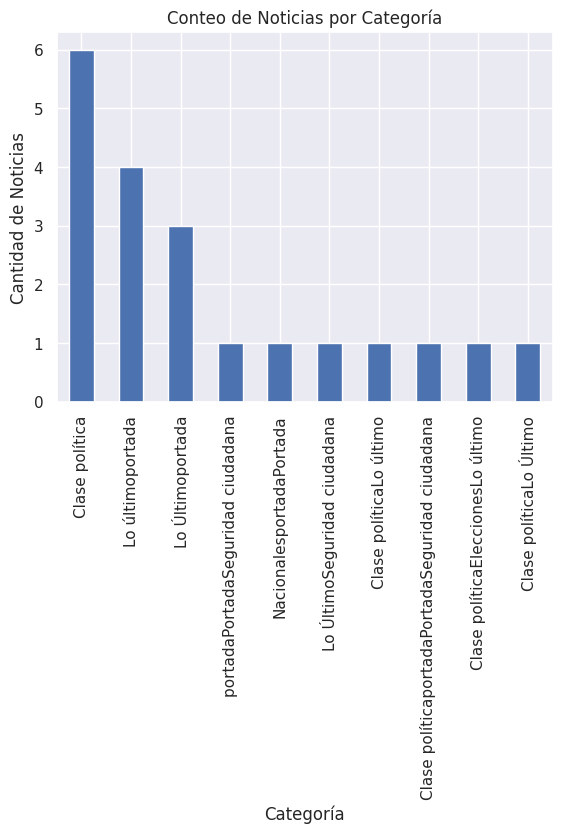

In [10]:
# Generar un gráfico de barras por categoría
category_counts = data['category_id'].value_counts()
category_counts.plot(kind='bar')
plt.title('Conteo de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()


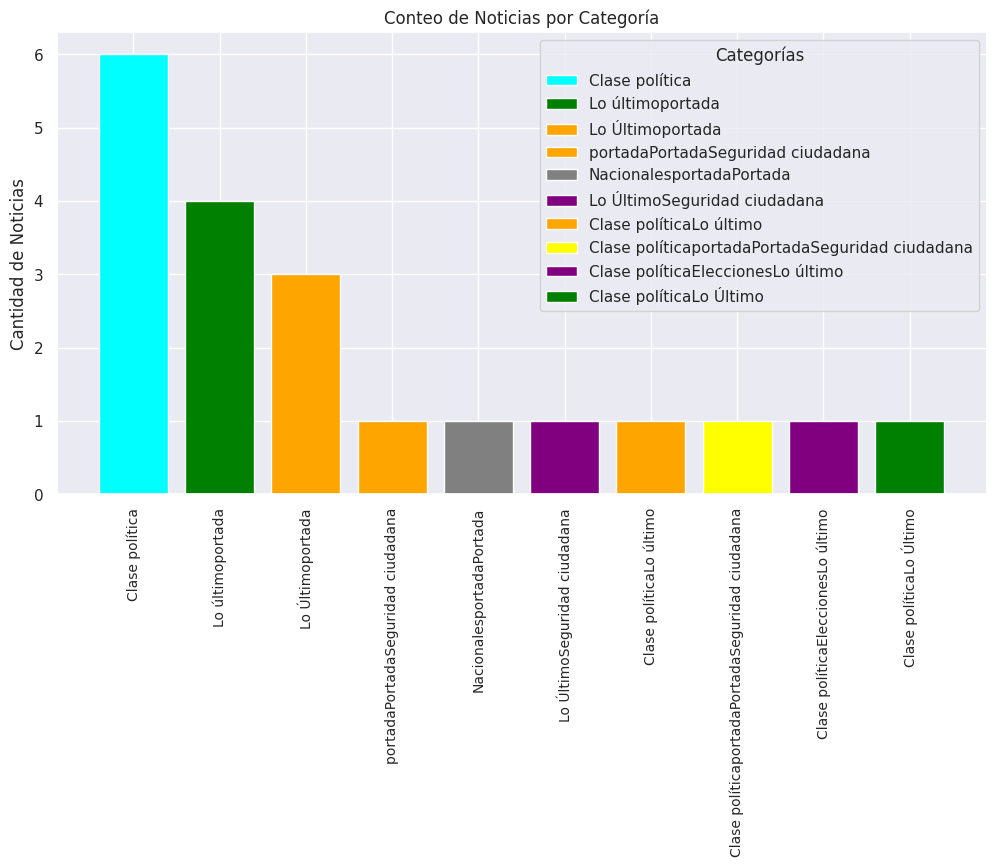

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes una lista de colores predefinidos para cada categoría
colores_categorias = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'cyan']

# Obtener el conteo de categorías
#category_counts = data['category_id'].value_counts()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
# Ajustar el ancho de las barras
bar_width = 0.8

# Generar el gráfico de barras con colores diferentes para cada categoría
bars = plt.bar(category_counts.index, category_counts, color=np.random.choice(colores_categorias, len(category_counts)))

# Añadir etiquetas y título
plt.title('Conteo de Noticias por Categoría')
#plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')

# Añadir leyenda con letras más pequeñas y orientación vertical
plt.xticks(rotation='vertical', fontsize='small')

# Añadir leyenda
plt.legend(bars, category_counts.index, title='Categorías', loc='upper right')

# Mostrar el gráfico
plt.show()

In [ ]:
# grafico1.py

import matplotlib.pyplot as plt
import numpy as np

def crear_grafico_de_barras(category_counts, colores_categorias):
    """
    Crea un gráfico de barras a partir del conteo de categorías.

    Parameters:
    - category_counts (pd.Series): Serie que contiene el conteo de categorías.
    - colores_categorias (list): Lista de colores predefinidos para cada categoría.

    Returns:
    - fig (matplotlib.figure.Figure): Figura del gráfico de barras.
    """
    # Crear una figura y ejes
    fig, ax = plt.subplots(figsize=(12, 6))
    # Ajustar el ancho de las barras
    bar_width = 0.8

    # Generar el gráfico de barras con colores diferentes para cada categoría
    bars = plt.bar(category_counts.index, category_counts, color=np.random.choice(colores_categorias, len(category_counts)))

    # Añadir etiquetas y título
    plt.title('Conteo de Noticias por Categoría')
    plt.ylabel('Cantidad de Noticias')

    # Añadir leyenda con letras más pequeñas y orientación vertical
    plt.xticks(rotation='vertical', fontsize='small')

    # Añadir leyenda
    plt.legend(bars, category_counts.index, title='Categorías', loc='upper right')

    return fig

    # el grafico se mostrara en streamlit


In [ ]:
# Guardar todo el contenido del DataFrame en un archivo CSV
data.to_csv('Noticias Ultima Hora.csv', index=False)

In [ ]:
# Generar un archivo de texto para comprobar el contenido guardado
with open('Noticias Ultima Hora.txt', 'w', encoding='utf-8') as file:
    for index, row in data.iterrows():
        file.write(f'Título: {row["title"]}\n')
        file.write(f'Autor: {row["author_id"]}\n')
        file.write(f'Fecha de Publicación: {row["publication_date"]}\n')
        file.write(f'Contenido: {row["content"]}\n')
        file.write(f'Categoría: {row["category_id"]}\n')
        file.write(f'URL: {row["url"]}\n')
        file.write(f'Fuente: {row["sourse_id"]}\n')
        file.write(f'Tipo de fuente: {row["sourse_type"]}\n')
        file.write('\n' + '-'*50 + '\n\n')

In [ ]:
# Guardar todo el contenido del DataFrame en un archivo JSON
data.to_json('Noticias Ultima Hora.json', orient='records', lines=True)

# **2. Análisis Exploratorio de Datos (EDA) y la Visualización de Patrones y Tendencias.**

El objetivo de esta parte es explorar y entender los datos que has obtenido mediante web scraping.

      author_id                                              title  \
0  Redacción UH  Más de 741,000 salvadoreños en el exterior ya ...   
1  Redacción UH  Aperturan la votación remota por internet para...   
2  Redacción UH  El Salvador otorgó más de 8 mil residencias a ...   
3  Redacción UH  Nuevo sistema de drenaje reducirá riesgo por i...   
4  Redacción UH  Presidente de Ecuador construirá cárceles «igu...   

                                             content     publication_date  \
0  Desde las cero horas de este 6 de enero, los s...  2024-01-06 10:33:00   
1  La noche de este viernes 5 de enero del 2024, ...  2024-01-05 21:43:00   
2  Los cambios en materia de seguridad y turismo ...  2024-01-05 19:42:00   
3  Las cuadrillas del Ministerio de Obras Pública...  2024-01-05 17:47:00   
4  El presidente de Ecuador, Daniel Noboa, destac...  2024-01-05 10:12:00   

                                                 url  \
0  https://ultimahora.sv/mas-de-741000-salvadoren...   
1  h

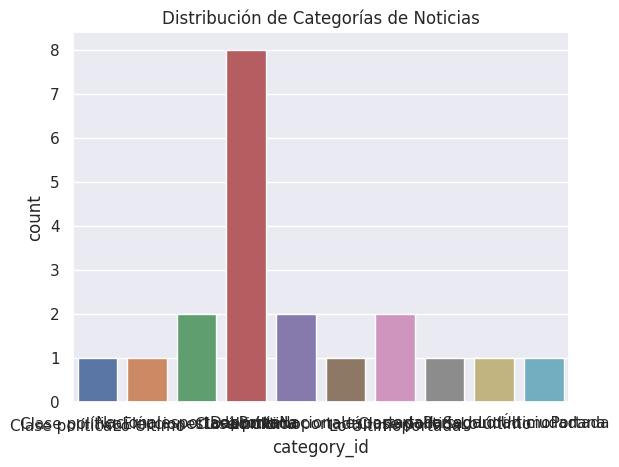

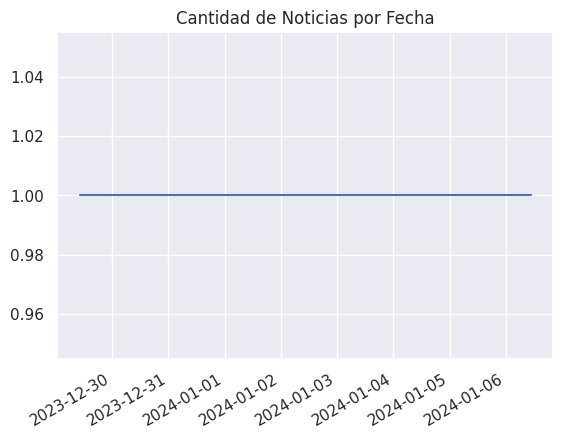

In [ ]:
# Cargar los datos web scrapeados en un DataFrame
#
# import pandas as pd

data = pd.read_csv('Noticias Ultima Hora.csv')

# Análisis Exploratorio de Datos (EDA)
# Mostrar las primeras filas del DataFrame
print(data.head())

# Obtener estadísticas descriptivas de los datos
print(data.describe())

# Visualización de Patrones y Tendencias
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de las categorías de noticias
sns.countplot(x='category_id', data=data)
plt.title('Distribución de Categorías de Noticias')
plt.show()

# Visualizar la cantidad de noticias por fecha
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['publication_date'].value_counts().plot()
plt.title('Cantidad de Noticias por Fecha')
plt.show()

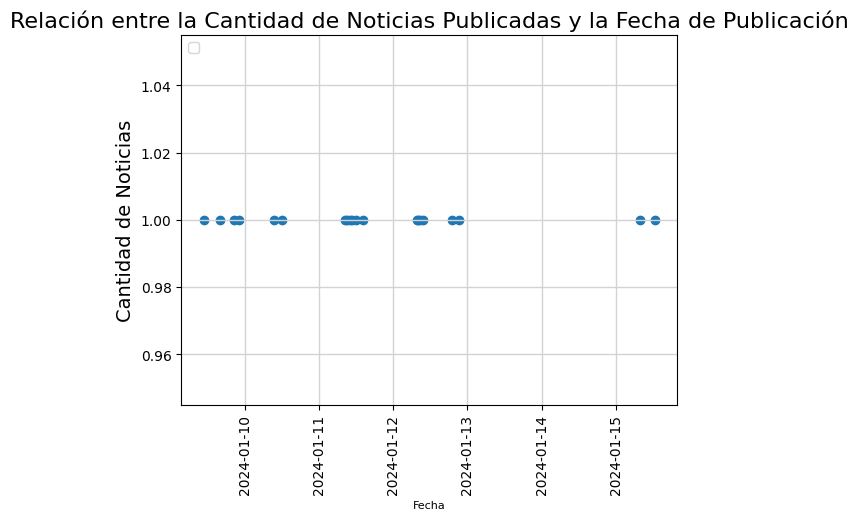

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna `publication_date` a un objeto `datetime`
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Obtener la cantidad de noticias publicadas por fecha
news_per_date = data['publication_date'].value_counts()

# Crear un gráfico de dispersión de la cantidad de noticias publicadas y la fecha de publicación
plt.scatter(news_per_date.index, news_per_date.values)
plt.title('Relación entre la Cantidad de Noticias Publicadas y la Fecha de Publicación', fontsize=16)
plt.xlabel('Fecha', fontsize=8)
plt.ylabel('Cantidad de Noticias', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=90)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.show()

# **WordCloud**

In [40]:
!pip install wordcloud

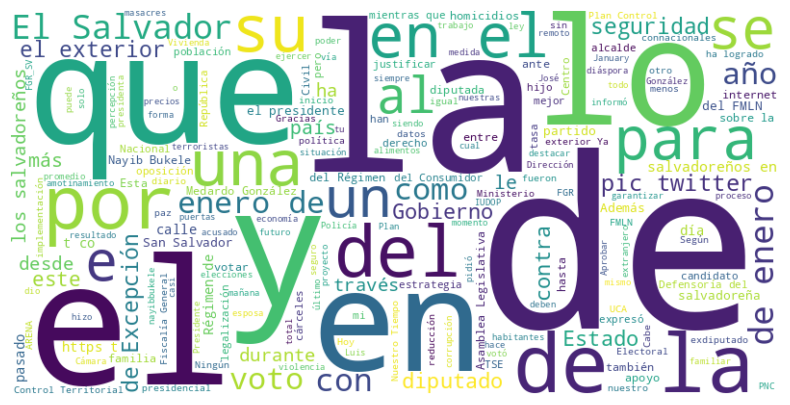

In [54]:
import pandas as pd
from wordcloud import WordCloud
import wordcloud
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'text' que contiene tus datos
# Puedes cargar tus datos en un DataFrame de la siguiente manera:
df = pd.read_csv("Noticias Ultima Hora.csv")

# Crear una cadena única que contenga todos los textos
all_text = " ".join(df['content'].astype(str))

# Eliminar las palabras vacías y las palabras derivadas
STOPWORDS = set(wordcloud.STOPWORDS)
all_text = " ".join([word for word in all_text.split() if word not in STOPWORDS])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(all_text)

# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

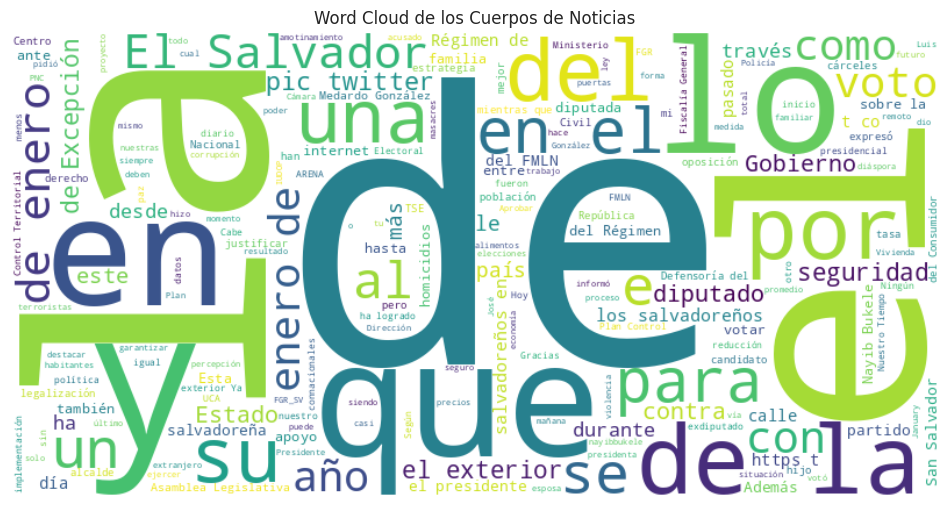

In [58]:
# Visualizar las palabras más frecuentes en los cuerpos de las noticias
from wordcloud import WordCloud
import wordcloud

texto_completo = ' '.join(df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de los Cuerpos de Noticias')
plt.show()

# **Este código te ayudará a explorar tus datos y visualizar patrones y tendencias.**

A continuación, continuemos con la implementación de modelos de aprendizaje automático. Para esto, puedes utilizar bibliotecas como scikit-learn para crear y entrenar tus modelos. Aquí tienes un ejemplo básico de cómo podrías crear un modelo de clasificación de noticias utilizando scikit-learn:

In [ ]:
print(data.columns)

Index(['author_id', 'title', 'content', 'publication_date', 'url',
       'category_id', 'sourse_id', 'sourse_type'],
      dtype='object')


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['category_id'], test_size=0.2, random_state=42)

# Crear una representación vectorial de los textos utilizando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenar un modelo de clasificación (SVM en este caso)
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.25


In [37]:
pip install seaborn

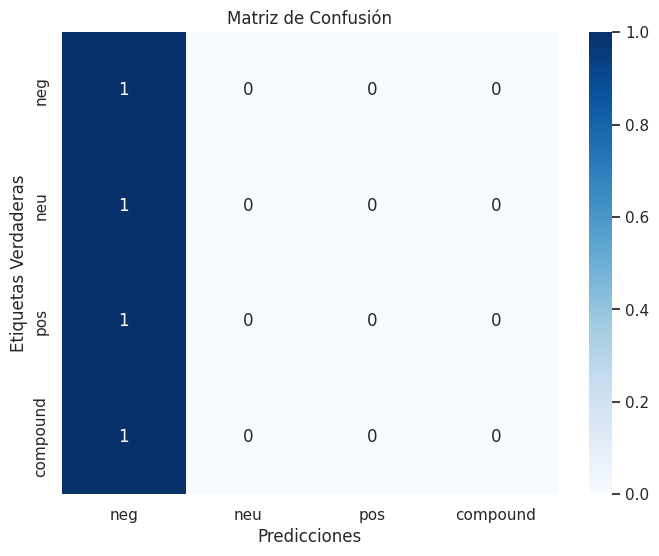

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

# **APRENDIZAJE AUTOMÁTICO**

In [59]:
pip install scikit-learn

In [ ]:
# import scikit-learn
import sklearn
import tensorflow

# Carga los datos
X_train, X_test, y_train, y_test = sklearn.datasets.load_iris(return_X_y=True)

# Preprocesa los datos
X_train = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test = sklearn.preprocessing.StandardScaler().fit_transform(X_test)
#X_train, X_test, y_train, y_test = sklearn.datasets.load_iris(return_X_y=True)

# Entrena el modelo
model = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Realiza inferencias en nuevos datos
y_pred = model.predict(X_test)

# Mide el rendimiento del modelo
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

# Guarda el modelo
model.save('my_model.h5')

# Carga el modelo
model = tensorflow.keras.models.load_model('my_model.h5')

# Realiza inferencias en nuevos datos
y_pred = model.predict(X_test)

# **Procesamiento del lenguaje natural (NLP)**

puedes utilizar la biblioteca nltk (Natural Language Toolkit) para tareas como tokenización, lematización, análisis de sentimientos, etc. Aquí tienes un ejemplo básico de cómo podrías realizar el análisis de sentimientos utilizando nltk:

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


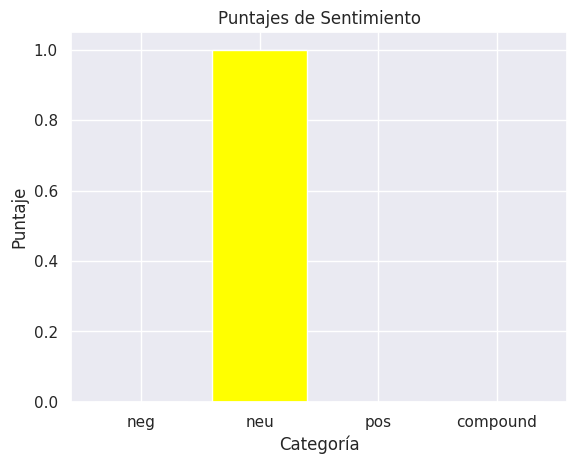

In [35]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# Crear un analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Analizar el sentimiento de un texto
text = "Este es un texto de ejemplo para analizar el sentimiento."
sentiment_score = sia.polarity_scores(text)

# Imprimir el puntaje de sentimiento
print(sentiment_score)

# Crear un gráfico de barras para visualizar los puntajes de sentimiento
categories = list(sentiment_score.keys())
scores = list(sentiment_score.values())

plt.bar(categories, scores, color=['green', 'yellow', 'red', 'blue'])
plt.title('Puntajes de Sentimiento')
plt.xlabel('Categoría')
plt.ylabel('Puntaje')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


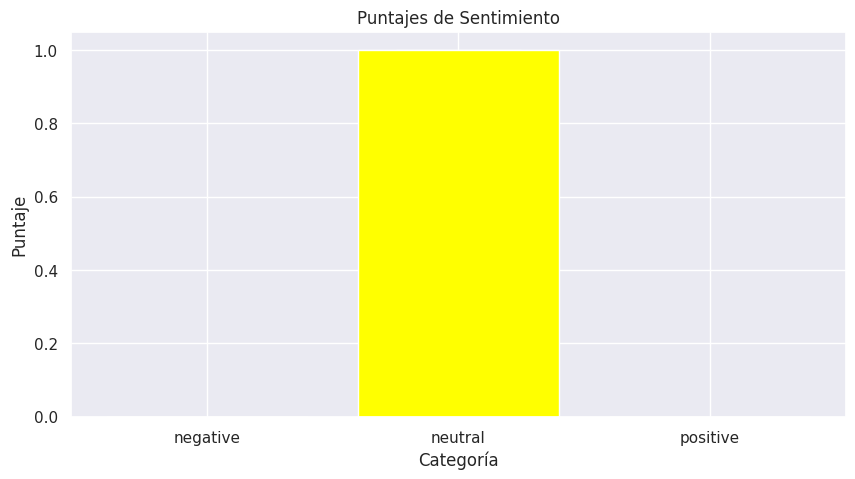

In [67]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# Crear un analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Analizar el sentimiento de un texto
text = "Este es un texto de ejemplo para analizar el sentimiento."
sentiment_score = sia.polarity_scores(text)

# Crear un gráfico de barras para visualizar los puntajes de sentimiento
categories = ['negative', 'neutral', 'positive']
scores = [sentiment_score['neg'], sentiment_score['neu'], sentiment_score['pos']]

plt.figure(figsize=(10, 5))
plt.bar(categories, scores, width=0.5)

plt.bar(categories, scores, color=['red', 'yellow', 'green'])
plt.title('Puntajes de Sentimiento')
plt.xlabel('Categoría')
plt.ylabel('Puntaje')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


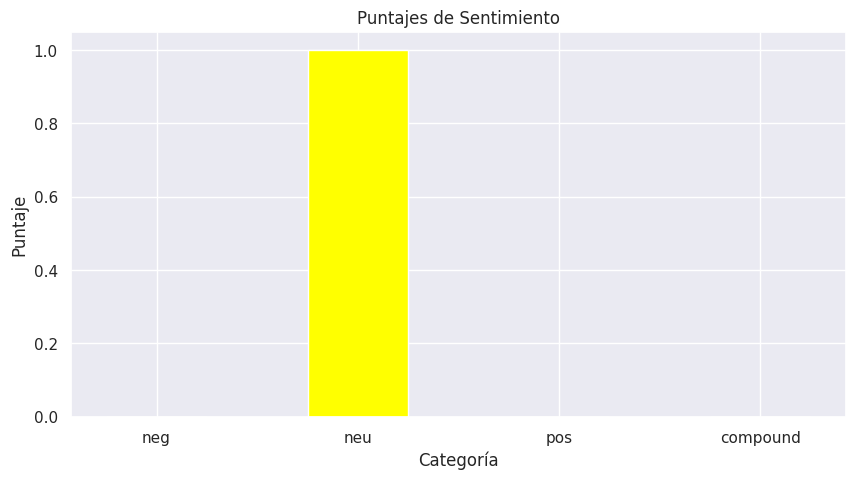

In [68]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# Crear un analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Analizar el sentimiento de un texto
text = "Este es un texto de ejemplo para analizar el sentimiento."
sentiment_score = sia.polarity_scores(text)

# Imprimir el puntaje de sentimiento
print(sentiment_score)

# Crear un gráfico de barras para visualizar los puntajes de sentimiento
categories = list(sentiment_score.keys())
scores = list(sentiment_score.values())

plt.figure(figsize=(10, 5))
plt.bar(categories, scores, width=0.5, color=['red', 'yellow', 'green'])
plt.title('Puntajes de Sentimiento')
plt.xlabel('Categoría')
plt.ylabel('Puntaje')
plt.show()

# **Creación de la interfaz interactiva utilizando Streamlit**

Finalmente, para la creación de la interfaz interactiva utilizando Streamlit, puedes utilizar la biblioteca streamlit para crear una aplicación web interactiva. Aquí tienes un ejemplo básico de cómo podrías crear una interfaz simple para mostrar las noticias y su análisis de sentimientos:

python


In [52]:
print(data.columns)

Index(['author_id', 'title', 'content', 'publication_date', 'url',
       'category_id', 'sourse_id', 'sourse_type'],
      dtype='object')


In [1]:
! pip install streamlit -q

In [ ]:
! pip install pil-plus

In [ ]:
! pip install streamlit Pillow

In [ ]:
! pip install streamlit-embedcode

In [ ]:
! pip install streamlit-extras

In [18]:
! pip install pathlib2

In [35]:
print("copiar y pegar el siguiente ip en la tunnel Password: ....y clic al botón azul ")
!wget -q -O - ipv4.icanhazip.com

copiar y pegar el siguiente ip en la tunnel Password: ....y clic al botón azul 
34.41.88.192


In [36]:
! streamlit run home.py & npx localtunnel --port 8501

  Stopping...
